In [1]:
#Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
###Economic Metrics 
##CPI
#API for CPI dataset 1
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0L1E'],"startyear":"1976", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [3]:
#add to dataframe
data = []
month = []
year = []


for results in json_data['Results']['series'][0]['data']:
    data.append(results["value"])
    month.append(results["periodName"])
    year.append(results["year"])

new_dict = {"year": year, "month": month, "data": data}
cpi = pd.DataFrame(new_dict)
cpi.head()

,year,month,data
0,1985,December,111.3
1,1985,November,111.2
2,1985,October,110.7
3,1985,September,110.0
4,1985,August,109.4


In [4]:
#API for CPI dataset2
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0L1E'],"startyear":"1986", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data_2 = json.loads(p.text)

In [5]:
#add to dataframe
data_2 = []
month_2 = []
year_2 = []


for results in json_data_2['Results']['series'][0]['data']:
    data_2.append(results["value"])
    month_2.append(results["periodName"])
    year_2.append(results["year"])

new_dict = {"year": year_2, "month": month_2, "data": data_2}
cpi_2 = pd.DataFrame(new_dict)
cpi_2.head()

,year,month,data
0,1995,December,162.7
1,1995,November,163.0
2,1995,October,162.8
3,1995,September,162.1
4,1995,August,161.6


In [6]:
#API for CPI dataset3
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0L1E'],"startyear":"1996", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data_3 = json.loads(p.text)

In [7]:
#add to dataframe
data_3 = []
month_3 = []
year_3 = []


for results in json_data_3['Results']['series'][0]['data']:
    data_3.append(results["value"])
    month_3.append(results["periodName"])
    year_3.append(results["year"])

new_dict = {"year": year_3, "month": month_3, "data": data_3}
cpi_3 = pd.DataFrame(new_dict)
cpi_3.head()

,year,month,data
0,2005,December,202.1
1,2005,November,202.3
2,2005,October,202.3
3,2005,September,201.3
4,2005,August,201.0


In [8]:
#API for CPI dataset4
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0L1E'],"startyear":"2006", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data_4 = json.loads(p.text)

In [9]:
json_data_4['Results']['series'][0]['data'][0]

{'year': '2015',
 'period': 'M12',
 'periodName': 'December',
 'value': '243.779',
 'footnotes': [{}]}

In [10]:
from pandas.io.json import json_normalize

In [11]:
#add to dataframe
data_4 = []
month_4 = []
year_4_2 = []

for results in json_data_4['Results']['series'][0]['data']:
    data_4.append(results["value"])
    month_4.append(results["periodName"])
    year_4_2.append(results["year"])

In [12]:
new_dict = {"year": year_4_2, "month": month_4, "data": data_4}
cpi_4 = pd.DataFrame(new_dict)
cpi_4.head()

,year,month,data
0,2015,December,243.779
1,2015,November,244.075
2,2015,October,243.985
3,2015,September,243.359
4,2015,August,242.651


In [13]:
#Concatenate all CPI dataframes to get full raw CPI data
cpi_f = pd.concat([cpi,cpi_2,cpi_3,cpi_4])
cpi_f.head()

,year,month,data
0,1985,December,111.3
1,1985,November,111.2
2,1985,October,110.7
3,1985,September,110.0
4,1985,August,109.4


In [14]:
#aggregate by max
cpi_df = cpi_f[["data", "year"]].groupby(["year"]).max()
cpi_df_1 = cpi_df.reset_index()
cpi_df_1.head()

,year,data
0,1976,58.9
1,1977,62.7
2,1978,68.0
3,1979,75.7
4,1980,84.9


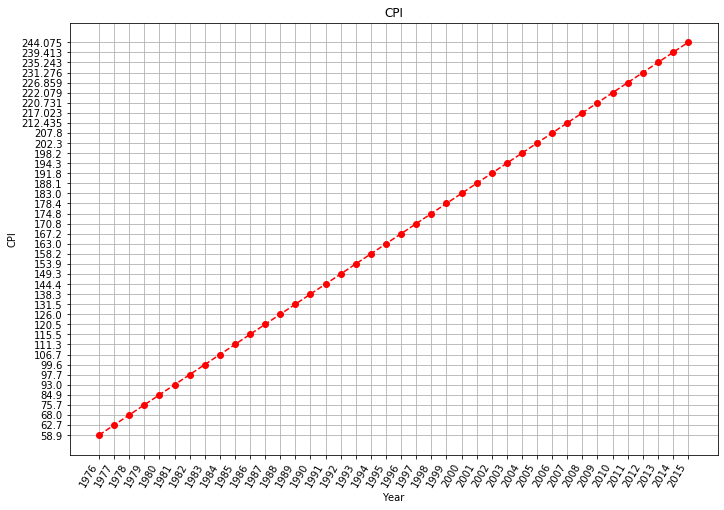

In [37]:
#Create, save, and show the CPI Scatter plot
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(cpi_df_1["year"], cpi_df_1["data"], color="r", marker="o", linestyle="dashed")
plt.grid(True)
plt.title("CPI")
plt.xlabel("Year") 
plt.xticks(cpi_df_1["year"], rotation=60, ha="right")
plt.ylabel("CPI")
plt.savefig("cpi.png")

plt.show()

In [16]:
##Wages
#API for wage dataset1
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['EES10140001'],"startyear":"1976", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [17]:
#Add to dataframe
data = []
month = []
year = []


for results in json_data['Results']['series'][0]['data']:
    data.append(results["value"])
    month.append(results["periodName"])
    year.append(results["year"])

new_dict = {"year": year, "month": month, "data": data}
wages = pd.DataFrame(new_dict)
wages.head()

,year,month,data
0,1985,December,109
1,1985,November,110
2,1985,October,110
3,1985,September,110
4,1985,August,110


In [46]:
#API for wage dataset 2
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['EES10140001'],"startyear":"1986", "endyear":"1995"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [47]:
#Add to dataframe
data = []
month = []
year = []


for results in json_data['Results']['series'][0]['data']:
    data.append(results["value"])
    month.append(results["periodName"])
    year.append(results["year"])

new_dict = {"year": year, "month": month, "data": data}
wages_2 = pd.DataFrame(new_dict)
wages_2.head()

,year,month,data
0,1995,December,105
1,1995,November,105
2,1995,October,105
3,1995,September,105
4,1995,August,105


In [48]:
#API for wage dataset 3
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['EES10140001'],"startyear":"1996", "endyear":"2003"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [49]:
#add to dataframe
data = []
month = []
year = []


for results in json_data['Results']['series'][0]['data']:
    data.append(results["value"])
    month.append(results["periodName"])
    year.append(results["year"])

new_dict = {"year": year, "month": month, "data": data}
wages_3 = pd.DataFrame(new_dict)
wages_3.head()

,year,month,data
0,2003,April,107
1,2003,March,104
2,2003,February,106
3,2003,January,107
4,2002,December,108


In [50]:
#API for wage dataset 4
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['EES10140001'],"startyear":"2004", "endyear":"2016"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [51]:
#Add to dataframe
data = []
month = []
year = []


for results in json_data['Results']['series'][0]['data']:
    data.append(results["value"])
    month.append(results["periodName"])
    year.append(results["year"])

new_dict = {"year": year, "month": month, "data": data}
wages_4 = pd.DataFrame(new_dict)
wages_4.head()

,year,month,data


In [52]:
#Concatenate to get full raw wage data
wages_f = pd.concat([wages,wages_2,wages_3])
pd.to_numeric(wages_f['data'])
pd.to_numeric(wages_f['year'])
wages_f.head()

,year,month,data
0,1985,December,109
1,1985,November,110
2,1985,October,110
3,1985,September,110
4,1985,August,110


In [53]:
#Aggregate by max
wages_df = wages_f[["year", "data"]].groupby(["year"]).max()
wages_df_1 = wages_df.reset_index()
wages_df.head()

,data
year,
1976,116
1977,117
1978,121
1979,127
1980,129


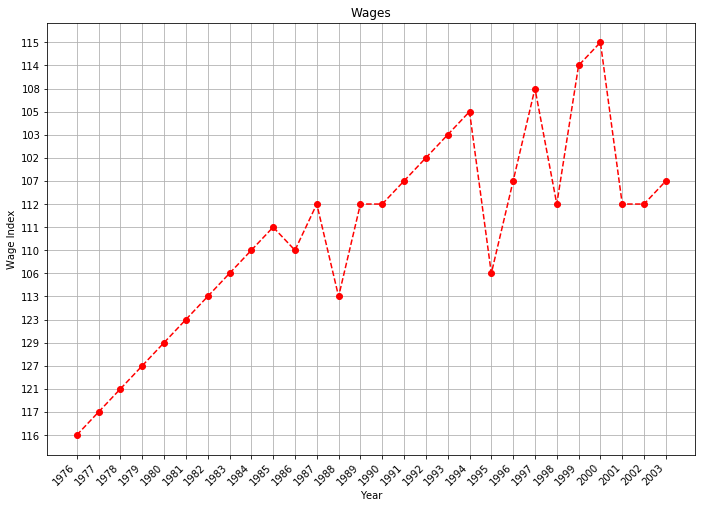

In [54]:
#Create, save, and show the wage Scatter plot
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(wages_df_1["year"], wages_df_1["data"], color="r", marker="o", linestyle="dashed")
plt.grid(True)
plt.title("Wages")
plt.xlabel("Year") 
plt.xticks(wages_df_1["year"], rotation=45, ha="right")
plt.ylabel("Wage Index")
plt.savefig("wages.png")

plt.show()

In [55]:
##GDP
#read in CSV as DF
gdp = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/GDP.csv")
gdp.head()

,DATE,GDP
0,1986,4507.89
1,1986,4545.34
2,1986,4607.67
3,1986,4657.63
4,1987,4722.16


In [56]:
#aggregate and prep for plot
gdp_df = gdp[["DATE", "GDP"]].groupby(["DATE"]).mean()
gdp_df_1 = gdp_df.reset_index()

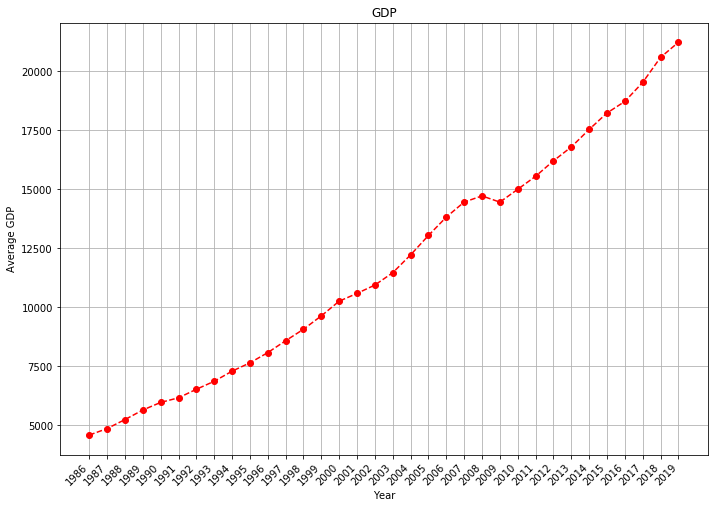

In [57]:
#Create the GDP Scatter plot
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(gdp_df_1["DATE"], gdp_df_1["GDP"], color="r", marker="o", linestyle="dashed")
plt.grid(True)
plt.title("GDP")
plt.xlabel("Year") 
plt.xticks(gdp_df_1["DATE"], rotation=45, ha="right")
plt.ylabel("Average GDP")
plt.savefig("gdp.png")

plt.show()

In [58]:
##Dow Jones Industrial Average
#Read in CSV as dataframe
djia = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/dji.csv")
djia.head()

,Date,Close
0,1985,1286.77
1,1985,1284.01
2,1985,1266.78
3,1985,1258.06
4,1985,1315.41


In [59]:
#Aggregate and prep for plot
djia_df = djia[["Date", "Close"]].groupby(["Date"]).mean()
djia_df_1 = djia_df.reset_index()
djia_df_1.head()

,Date,Close
0,1985,1345.807500
1,1986,1815.099167
2,1987,2273.365833
3,1988,2077.340000
4,1989,2535.720000


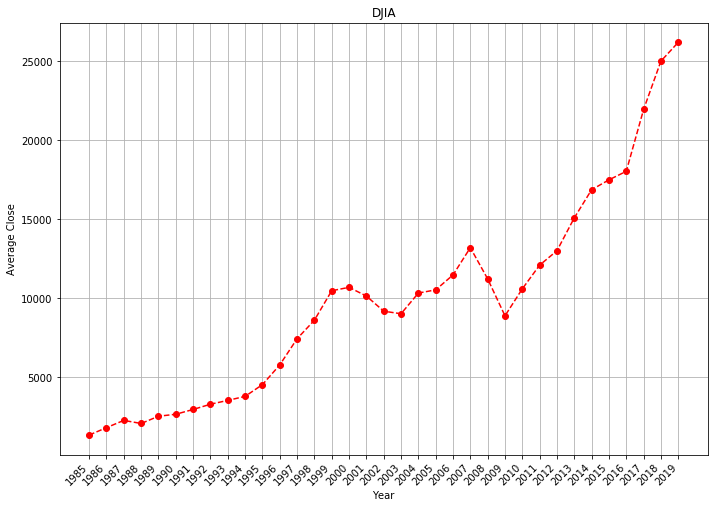

In [60]:
#Create the DJIA Scatter plot
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(djia_df_1["Date"], djia_df_1["Close"], color="r", marker="o", linestyle="dashed")
plt.grid(True)
plt.title("DJIA")
plt.xlabel("Year") 
plt.xticks(djia_df_1["Date"], rotation=45, ha="right")
plt.ylabel("Average Close")
plt.savefig("djia.png")

plt.show()

In [61]:
##NBA Statistics
#Read in CSVs
nba_revenue_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/nba_revenue.csv"
nba_revenue_millions = "/Users/samuelgiddins/Desktop/project_one/csv_files/nba_revenue_1.csv"
player_salary_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/player_salary.csv"
salary_cap_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/salary_cap.csv"
tv_viewership_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/tv_viewership.csv"

In [62]:
#Create DataFrames
nba_revenue_df = pd.read_csv(nba_revenue_csv)
nba_revenue_millions_df = pd.read_csv(nba_revenue_millions)
player_salary_df = pd.read_csv(player_salary_csv)
player_salaries_df = player_salary_df[['Year','Team','Player','Salary']]
salary_cap_df = pd.read_csv(salary_cap_csv)
tv_viewership_df = pd.read_csv(tv_viewership_csv)

In [63]:
#create a DF for average salary to show in visualization
avg_salary_df = player_salaries_df[["Salary", "Year"]].groupby(["Year"]).mean()

In [64]:
nba_revenue_millions_df.head()

,Year,NBA Revenue (100s of Millions)
0,2002,26.6
1,2003,27.2
2,2004,29.3
3,2005,31.9
4,2006,33.7


In [65]:
avg_salary_df.head()

,Salary
Year,
1991,8.316232
1992,9.525309
1993,10.566158
1994,12.698832
1995,13.891740


In [66]:
salary_cap_df.head()

,Year,Salary Cap (Millions USD)
0,1984,7.93
1,1985,9.15
2,1986,10.32
3,1987,12.35
4,1988,13.83


In [67]:
tv_viewership_df.head()

,Year,Viewership (millions)
0,2002,15.68
1,2003,9.86
2,2004,17.94
3,2005,12.54
4,2006,12.97


In [68]:
#Merge to get all NBA metrics in same DF
nba_merge1 =  pd.merge(nba_revenue_millions_df, avg_salary_df, how="left", on="Year")
nba_merge2 = pd.merge(nba_merge1, salary_cap_df, how="left", on="Year")
full_nba_df = pd.merge(nba_merge2, tv_viewership_df, how="left", on="Year")

In [69]:
#Rename columns where necessary
full_nba_df.rename(columns =  {"Salary": "Average Salary (/$100k)", "Viewership (millions)": "TV Viewership (Millions)"})


,Year,NBA Revenue (100s of Millions),Average Salary (/$100k),Salary Cap (Millions USD),TV Viewership (Millions)
0,2002,26.6,33.956645,51.89,15.68
1,2003,27.2,35.987371,55.02,9.86
2,2004,29.3,36.283015,53.24,17.94
3,2005,31.9,36.721781,58.20,12.54
4,2006,33.7,38.178551,60.74,12.97
5,2007,35.7,37.295750,61.24,9.29
6,2008,37.7,42.120020,64.83,14.94
7,2009,37.9,45.634736,62.72,14.35
8,2010,38.1,44.580485,61.16,18.14
9,2011,39.6,43.012293,59.93,17.34


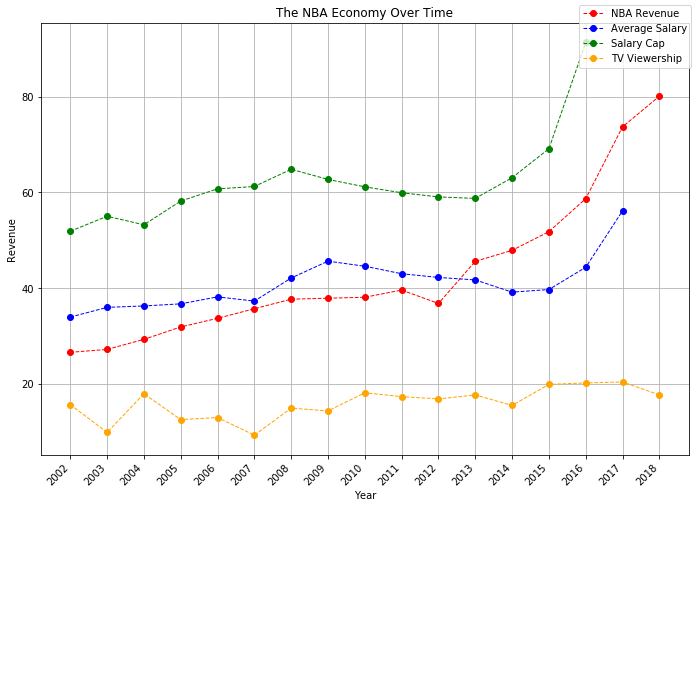

In [70]:
#Create the NBA Scatter plot
metric_list = ['NBA Revenue', 'Average Salary', 'Salary Cap', 'TV Viewership']
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(full_nba_df["Year"], full_nba_df["NBA Revenue (100s of Millions)"], color="r", marker="o", linestyle="dashed", linewidth=1)
plt.plot(full_nba_df["Year"], full_nba_df["Salary"], color="b", marker="o", linestyle="dashed", linewidth=1)
plt.plot(full_nba_df["Year"], full_nba_df["Salary Cap (Millions USD)"], color="g", marker="o", linestyle="dashed", linewidth=1)
plt.plot(full_nba_df["Year"], full_nba_df["Viewership (millions)"], color="orange", marker="o", linestyle="dashed", linewidth=1)
plt.grid(True)
plt.title("The NBA Economy Over Time")
plt.xlabel("Year") 
plt.xticks(full_nba_df["Year"], rotation=45, ha="right")
plt.ylabel("Revenue")
plt.figlegend(metric_list)
plt.savefig("nba_economy.png")

plt.show()

In [71]:
##Comparison to other major sports
#Read in CSVs
mlb_csv = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/mlb_revenue.csv")
nfl_csv = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/nfl_revenue.csv")
nhl_csv = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/nhl_revenue.csv")

In [72]:
#Create dataframes
mlb_df = pd.DataFrame(mlb_csv)
mlb_df.rename(columns = {"Revenue (Billions USD)": "MLB Revenue (Billions USD)"})

nfl_df = pd.DataFrame(nfl_csv)
nfl_df.rename(columns = {"Revenue (Billions USD)": "NFL Revenue (Billions USD)"})

nhl_df = pd.DataFrame(nhl_csv)
nhl_df.rename(columns = {"Revenue (Billions USD)": "NHL Revenue (Billions USD)"})

mlb_df.head()

,Year,Revenue (Billions USD)
0,2001,3.58
1,2002,3.65
2,2003,3.88
3,2004,4.27
4,2005,4.73


In [73]:
nfl_df.head()

,Year,Revenue (Billions USD)
0,2001,4.28
1,2002,4.94
2,2003,5.33
3,2004,6.03
4,2005,6.16


In [74]:
nhl_df.head()

,Year,Revenue (Billions USD)
0,2005,2.27
1,2006,2.44
2,2007,2.75
3,2008,2.82
4,2009,2.93


In [75]:
nba_revenue_df.head()

,Year,NBA Revenue (Billions of $)
0,2002,2.66
1,2003,2.72
2,2004,2.93
3,2005,3.19
4,2006,3.37


In [76]:
#Merge to get all info in same DF
merge1 = pd.merge(mlb_df, nfl_df, how="left", on="Year")
merge2 = pd.merge(merge1, nhl_df, how="left", on="Year")
sports_df = pd.merge(merge2, nba_revenue_df, how="left", on="Year")

In [77]:
#Rename columns where necessary
sports_df.rename(columns= {"Revenue (Billions USD)_x": "MLB Revenue (Billions USD)", "Revenue (Billions USD)_y": "NFL Revenue (Billions USD)", "Revenue (Billions USD)": "NHL Revenue (Billions USD)", "NBA Revenue (Billions of $)": "NBA Revenue (Billions USD)"})

,Year,MLB Revenue (Billions USD),NFL Revenue (Billions USD),NHL Revenue (Billions USD),NBA Revenue (Billions USD)
0,2001,3.58,4.28,NaN,NaN
1,2002,3.65,4.94,NaN,2.66
2,2003,3.88,5.33,NaN,2.72
3,2004,4.27,6.03,NaN,2.93
4,2005,4.73,6.16,2.27,3.19
5,2006,5.11,6.54,2.44,3.37
6,2007,5.48,7.09,2.75,3.57
7,2008,5.82,7.57,2.82,3.77
8,2009,5.90,8.02,2.93,3.79
9,2010,6.14,8.35,3.09,3.81


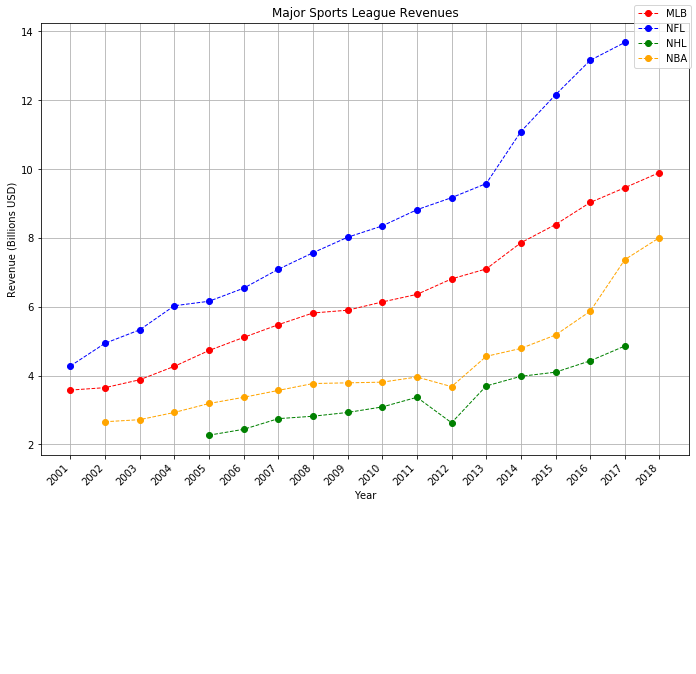

In [78]:
#Create the all sports Scatter plot
sport_list = ['MLB', 'NFL', 'NHL', 'NBA']
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(sports_df["Year"], sports_df["Revenue (Billions USD)_x"], color="r", marker="o", linestyle="dashed", linewidth=1)
plt.plot(sports_df["Year"], sports_df["Revenue (Billions USD)_y"], color="b", marker="o", linestyle="dashed", linewidth=1)
plt.plot(sports_df["Year"], sports_df["Revenue (Billions USD)"], color="g", marker="o", linestyle="dashed", linewidth=1)
plt.plot(sports_df["Year"], sports_df["NBA Revenue (Billions of $)"], color="orange", marker="o", linestyle="dashed", linewidth=1)
plt.grid(True)
plt.title("Major Sports League Revenues")
plt.xlabel("Year") 
plt.xticks(sports_df["Year"], rotation=45, ha="right")
plt.ylabel("Revenue (Billions USD)")
plt.figlegend(sport_list)

plt.savefig("major_sports_economies.png")
plt.show()

In [79]:
###Summary
##General Economy
#1. The US CPI has grown consistently and remained stable over time compared to other economic metrics
#2. The US wage index saw dramatic dips in 1988, 1995, 1998, and 2001
#3. US GDP dipped in 2008-2009, likely due to the housing crisis.
#4. The DJIA took dips between 1999-2003 and 2007-2009

##NBA
#1. The NBA's salary cap decreased between 2008 and 2013, as did the average player salary.
#2. NBA Revenue dipped between 2011-2012.
#3. NBA TV viewership has remained fairly steady over time.

##All Major Sports
#1. All major sports have consistently grown, but in 2011-2012, the NBA and NHL saw dips in revenue. 